# Market Regime Analysis System - Interactive Demo

This notebook demonstrates the **Market Regime Analysis System**, a professional-grade Python application implementing Jim Simons' Hidden Markov Model methodology for quantitative trading analysis.

## 🎯 What You'll Learn

- **Market Regime Detection** using Hidden Markov Models
- **Risk Management** with Kelly Criterion and regime adjustments  
- **Portfolio Analysis** across multiple assets
- **Statistical Arbitrage** opportunity identification
- **Data Provider Flexibility** (Yahoo Finance, Alpha Vantage, Polygon.io)

## 📋 Prerequisites

```bash
# Install the package and dependencies
uv sync

# Optional: Set API keys for professional data providers
# export ALPHA_VANTAGE_API_KEY=your_key_here
# export POLYGON_API_KEY=your_key_here
```

## 1. Setup and Imports

Let's start by importing the necessary components and setting up our environment.

In [21]:
# Core imports
import os
import warnings
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

# Market Regime Analysis imports
from market_regime_analysis import (
    MarketRegime,
    MarketRegimeAnalyzer,
    PortfolioHMMAnalyzer,
    SimonsRiskCalculator,
)
from market_regime_analysis.providers import list_available_providers

# Configure plotting
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 8)
sns.set_palette("husl")

print("✅ Setup complete! Ready for market regime analysis.")

✅ Setup complete! Ready for market regime analysis.


## 2. Data Provider Overview

The system supports multiple data providers with a plug-and-play architecture.

In [22]:
# Check available data providers
providers = list_available_providers()

print("📊 Available Data Providers:")
print("=" * 50)

for name, info in providers.items():
    print(f"\n🔹 {name.upper()}")
    print(f"   Description: {info['description']}")
    print(f"   API Key Required: {'Yes' if info['requires_api_key'] else 'No'}")
    print(f"   Rate Limit: {info['rate_limit_per_minute']}/min")
    print(f"   Supported Intervals: {', '.join(info['supported_intervals'])}")

📊 Available Data Providers:

🔹 YFINANCE
   Description: Free Yahoo Finance data provider with comprehensive market coverage
   API Key Required: No
   Rate Limit: 60/min
   Supported Intervals: 1d, 30m, 2m, 1mo, 15m, 5d, 1wk, 60m, 90m, 1m, 5m, 1h, 3mo

🔹 ALPHAVANTAGE
   Description: Professional Alpha Vantage API with real-time and historical data
   API Key Required: Yes
   Rate Limit: 5/min
   Supported Intervals: 30m, 1mo, 60min, 1wk, weekly, 1day, 1m, 1min, monthly, 5m, 1d, 1hour, 30min, 15m, 1month, 1week, 5min, daily, 15min, 1h

🔹 POLYGON
   Description: High-quality market data from Polygon.io with tick-level precision
   API Key Required: Yes
   Rate Limit: 60/min
   Supported Intervals: 30m, 1mo, hour, 1w, 1wk, quarter, weekly, 1day, 1m, monthly, day, 5m, 1d, 1hour, week, 15m, year, 1month, 1week, month, minute, daily, 1h


## 3. Single Asset Analysis

Let's start with a comprehensive analysis of a single asset (SPY - S&P 500 ETF).

In [23]:
# Initialize analyzer for SPY
print("🚀 Initializing SPY Market Regime Analyzer...")

analyzer = MarketRegimeAnalyzer(
    symbol="SPY",
    periods={
        "1D": "1y",  # Daily data for 1 year
        "1H": "3mo",  # Hourly data for 3 months
    },
    provider_flag="yfinance",  # Using free Yahoo Finance data
)

print(f"✅ Successfully initialized analyzer for {analyzer.symbol}")
print(f"📈 Data loaded for timeframes: {list(analyzer.periods.keys())}")
print(f"🌐 Using provider: {analyzer.provider.provider_name}")

🚀 Initializing SPY Market Regime Analyzer...
Loading data for SPY...
✓ Loaded 250 bars for 1D
✓ Loaded 437 bars for 1H
Calculating technical indicators...
✓ Calculated indicators for 1D
✓ Calculated indicators for 1H
Training HMM models...
✓ Trained HMM for 1D
✓ Trained HMM for 1H
✅ Successfully initialized analyzer for SPY
📈 Data loaded for timeframes: ['1D', '1H']
🌐 Using provider: yfinance


### 3.1 Current Regime Analysis

Now let's analyze the current market regime across different timeframes.

In [24]:
# Analyze current regime for each timeframe
analyses = {}

print("📊 CURRENT MARKET REGIME ANALYSIS")
print("=" * 60)

for timeframe in analyzer.periods:
    analysis = analyzer.analyze_current_regime(timeframe)
    analyses[timeframe] = analysis

    # Get latest price
    latest_price = analyzer.data[timeframe]["Close"].iloc[-1]

    print(f"\n🕐 {timeframe} Timeframe Analysis:")
    print(f"   💰 Latest Price: ${latest_price:.2f}")
    print(f"   🎯 Current Regime: {analysis.current_regime.value}")
    print(f"   📈 Recommended Strategy: {analysis.recommended_strategy.value}")
    print(f"   🎲 Confidence: {analysis.regime_confidence:.1%}")
    print(f"   📊 Persistence: {analysis.regime_persistence:.1%}")
    print(f"   💼 Position Size: {analysis.position_sizing_multiplier:.1%}")
    print(f"   ⚠️  Risk Level: {analysis.risk_level}")

    # Show arbitrage opportunities if any
    if analysis.arbitrage_opportunities:
        print(f"   💡 Arbitrage Opportunities ({len(analysis.arbitrage_opportunities)}):")
        for opp in analysis.arbitrage_opportunities[:2]:  # Show first 2
            print(f"      • {opp}")

    # Show statistical signals if any
    if analysis.statistical_signals:
        print(f"   📡 Statistical Signals ({len(analysis.statistical_signals)}):")
        for signal in analysis.statistical_signals[:2]:  # Show first 2
            print(f"      • {signal}")

📊 CURRENT MARKET REGIME ANALYSIS

🕐 1D Timeframe Analysis:
   💰 Latest Price: $643.44
   🎯 Current Regime: Low Volatility
   📈 Recommended Strategy: Momentum
   🎲 Confidence: 100.0%
   📊 Persistence: 0.0%
   💼 Position Size: 50.0%
   ⚠️  Risk Level: High
   📡 Statistical Signals (1):
      • MACD: Bullish signal

🕐 1H Timeframe Analysis:
   💰 Latest Price: $643.46
   🎯 Current Regime: Low Volatility
   📈 Recommended Strategy: Momentum
   🎲 Confidence: 100.0%
   📊 Persistence: 0.0%
   💼 Position Size: 50.0%
   ⚠️  Risk Level: High
   💡 Arbitrage Opportunities (1):
      • Vol Regime: Expect breakout (Low vol)
   📡 Statistical Signals (1):
      • MACD: Bearish signal


### 3.2 Regime Comparison Visualization

Let's create a visual comparison of regime analysis across timeframes.

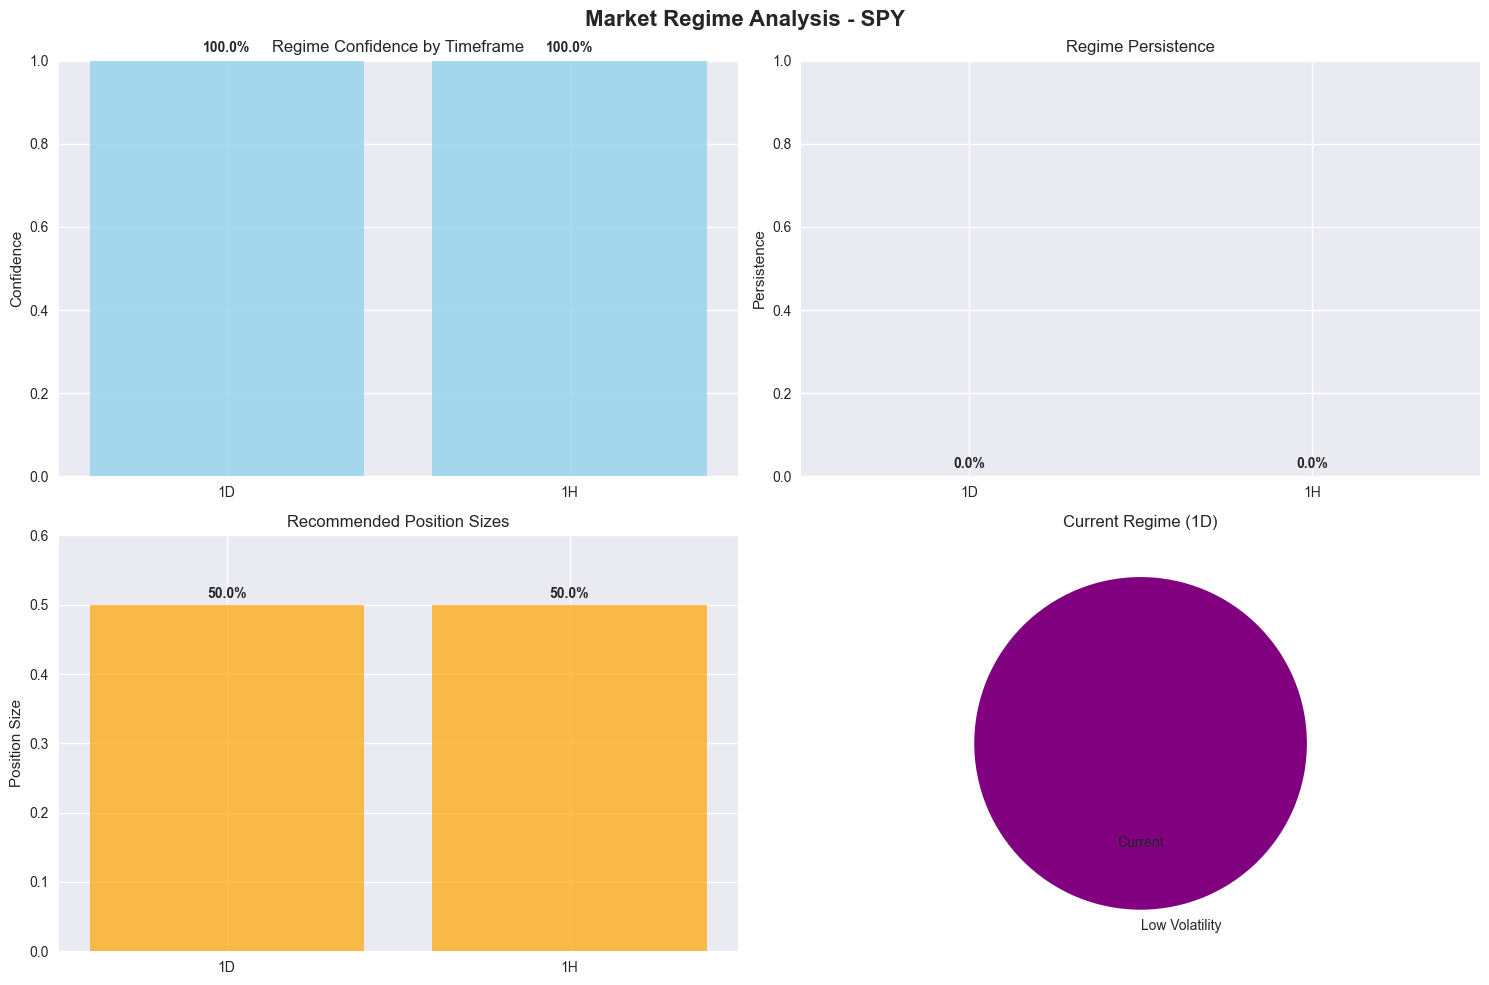


📋 REGIME ANALYSIS SUMMARY
1D: Low Volatility (100% confidence)
1H: Low Volatility (100% confidence)


In [25]:
# Create regime comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f"Market Regime Analysis - {analyzer.symbol}", fontsize=16, fontweight="bold")

# Prepare data for visualization
timeframes = list(analyses.keys())
regimes = [analyses[tf].current_regime.value for tf in timeframes]
confidences = [analyses[tf].regime_confidence for tf in timeframes]
persistence = [analyses[tf].regime_persistence for tf in timeframes]
position_sizes = [analyses[tf].position_sizing_multiplier for tf in timeframes]

# Plot 1: Regime Confidence by Timeframe
axes[0, 0].bar(timeframes, confidences, color="skyblue", alpha=0.7)
axes[0, 0].set_title("Regime Confidence by Timeframe")
axes[0, 0].set_ylabel("Confidence")
axes[0, 0].set_ylim(0, 1)
for i, (_tf, conf) in enumerate(zip(timeframes, confidences, strict=False)):
    axes[0, 0].text(i, conf + 0.02, f"{conf:.1%}", ha="center", fontweight="bold")

# Plot 2: Regime Persistence
axes[0, 1].bar(timeframes, persistence, color="lightgreen", alpha=0.7)
axes[0, 1].set_title("Regime Persistence")
axes[0, 1].set_ylabel("Persistence")
axes[0, 1].set_ylim(0, 1)
for i, (_tf, pers) in enumerate(zip(timeframes, persistence, strict=False)):
    axes[0, 1].text(i, pers + 0.02, f"{pers:.1%}", ha="center", fontweight="bold")

# Plot 3: Position Sizing Recommendations
axes[1, 0].bar(timeframes, position_sizes, color="orange", alpha=0.7)
axes[1, 0].set_title("Recommended Position Sizes")
axes[1, 0].set_ylabel("Position Size")
axes[1, 0].set_ylim(0, max(position_sizes) * 1.2)
for i, (_tf, size) in enumerate(zip(timeframes, position_sizes, strict=False)):
    axes[1, 0].text(
        i, size + max(position_sizes) * 0.02, f"{size:.1%}", ha="center", fontweight="bold"
    )

# Plot 4: Regime Distribution (Pie Chart for primary timeframe)
primary_regime = analyses[timeframes[0]].current_regime.value
regime_colors = {
    "Bull Trending": "green",
    "Bear Trending": "red",
    "Mean Reverting": "blue",
    "High Volatility": "orange",
    "Low Volatility": "purple",
    "Breakout": "brown",
    "Unknown": "gray",
}

# Create a simple regime overview for the pie chart
all_regimes = list(MarketRegime)
current_regime_idx = next(i for i, r in enumerate(all_regimes) if r.value == primary_regime)
regime_data = [1 if i == current_regime_idx else 0 for i in range(len(all_regimes))]
regime_labels = [r.value for r in all_regimes]
colors = [regime_colors.get(label, "lightgray") for label in regime_labels]

# Only show current regime
axes[1, 1].pie(
    [1],
    labels=[primary_regime],
    colors=[regime_colors.get(primary_regime, "lightgray")],
    autopct="Current",
    startangle=90,
)
axes[1, 1].set_title(f"Current Regime ({timeframes[0]})")

plt.tight_layout()
plt.show()

# Print regime summary
print("\n📋 REGIME ANALYSIS SUMMARY")
print("=" * 40)
for tf in timeframes:
    analysis = analyses[tf]
    print(f"{tf}: {analysis.current_regime.value} ({analysis.regime_confidence:.0%} confidence)")

### 3.3 Price and Technical Analysis

Let's examine the price data and technical indicators that drive the regime detection.

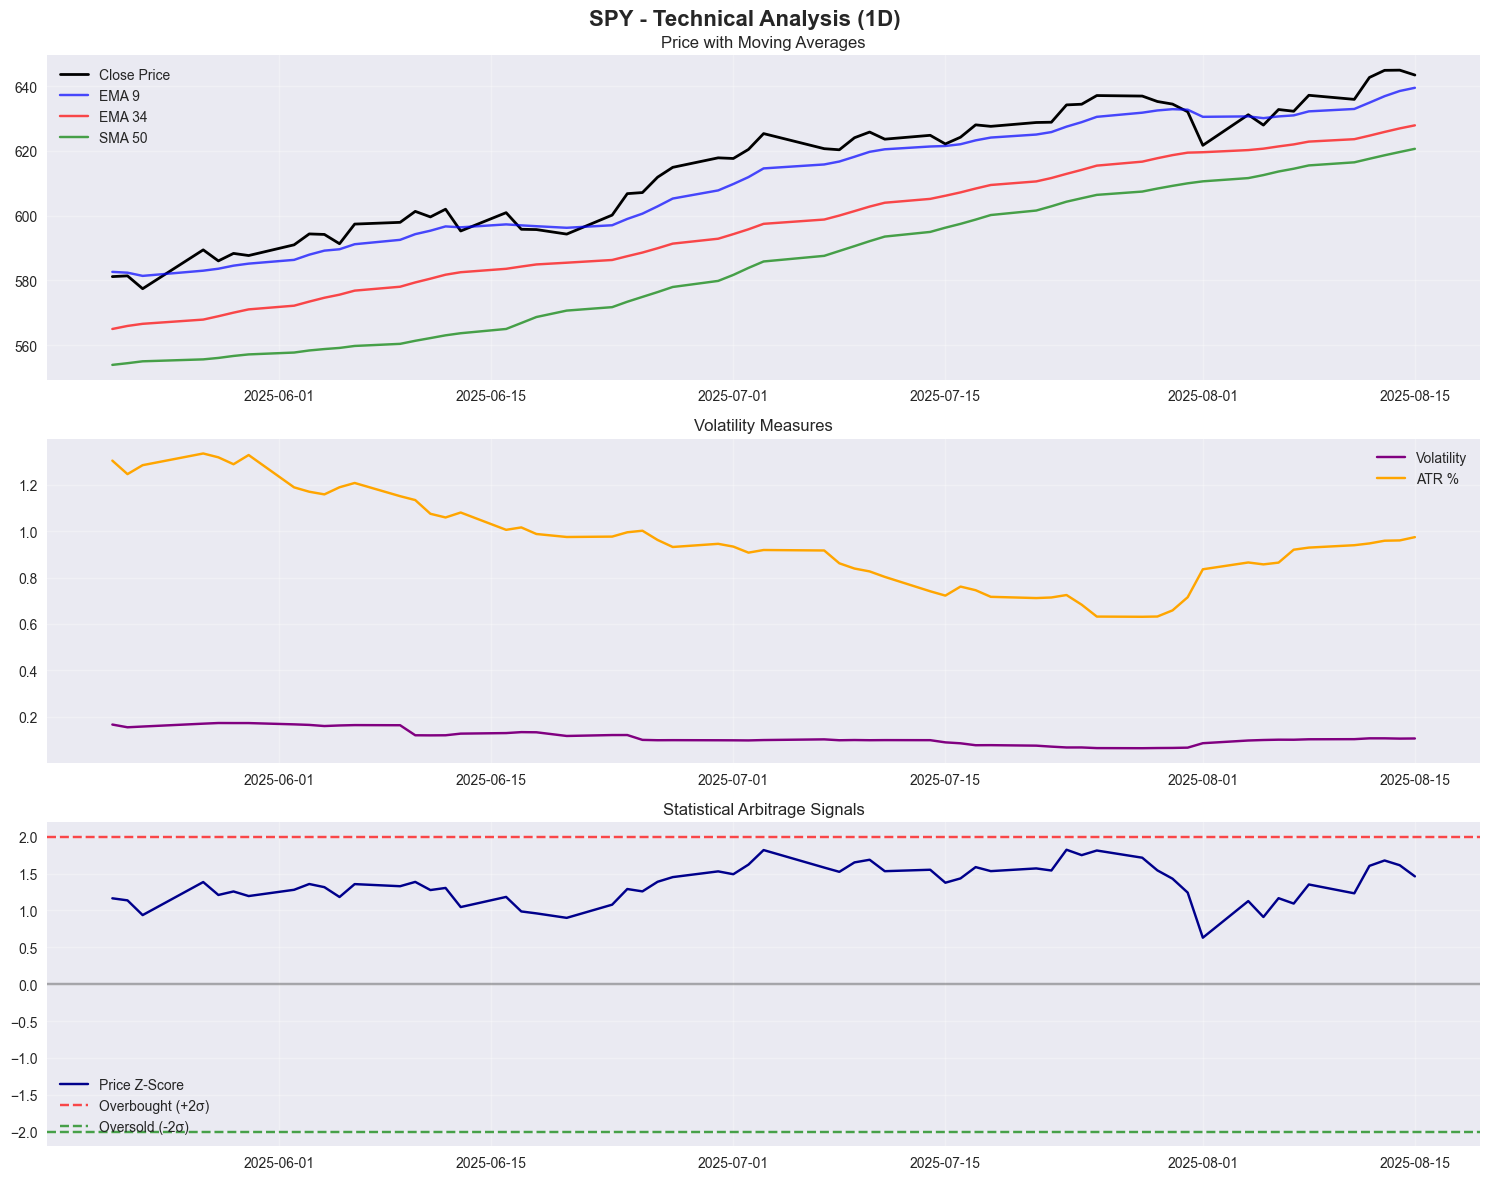


🎯 KEY TECHNICAL LEVELS
RESISTANCE: $646.19
SUPPORT: $589.31
SMA_50: $620.64
SMA_200: $588.62
BB_UPPER: $646.82
BB_LOWER: $622.89
ATR_RESISTANCE: $649.71
ATR_SUPPORT: $637.17


In [26]:
# Plot price data with technical indicators
timeframe = "1D"  # Focus on daily data
price_data = analyzer.data[timeframe].tail(60)  # Last 60 days
indicators = analyzer.indicators[timeframe].tail(60)

fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle(
    f"{analyzer.symbol} - Technical Analysis ({timeframe})", fontsize=16, fontweight="bold"
)

# Plot 1: Price with Moving Averages
axes[0].plot(price_data.index, price_data["Close"], label="Close Price", linewidth=2, color="black")
if "ema_9" in indicators.columns:
    axes[0].plot(price_data.index, indicators["ema_9"], label="EMA 9", alpha=0.7, color="blue")
if "ema_34" in indicators.columns:
    axes[0].plot(price_data.index, indicators["ema_34"], label="EMA 34", alpha=0.7, color="red")
if "sma_50" in indicators.columns:
    axes[0].plot(price_data.index, indicators["sma_50"], label="SMA 50", alpha=0.7, color="green")

axes[0].set_title("Price with Moving Averages")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Volatility and ATR
if "volatility" in indicators.columns:
    axes[1].plot(price_data.index, indicators["volatility"], label="Volatility", color="purple")
if "atr_percent" in indicators.columns:
    axes[1].plot(price_data.index, indicators["atr_percent"], label="ATR %", color="orange")

axes[1].set_title("Volatility Measures")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Statistical Arbitrage Signals
if "price_zscore" in indicators.columns:
    axes[2].plot(
        price_data.index, indicators["price_zscore"], label="Price Z-Score", color="darkblue"
    )
    axes[2].axhline(y=2, color="red", linestyle="--", alpha=0.7, label="Overbought (+2σ)")
    axes[2].axhline(y=-2, color="green", linestyle="--", alpha=0.7, label="Oversold (-2σ)")
    axes[2].axhline(y=0, color="black", linestyle="-", alpha=0.3)

axes[2].set_title("Statistical Arbitrage Signals")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print key technical levels
current_analysis = analyses[timeframe]
if current_analysis.key_levels:
    print("\n🎯 KEY TECHNICAL LEVELS")
    print("=" * 30)
    for level_name, level_value in current_analysis.key_levels.items():
        print(f"{level_name.upper()}: ${level_value:.2f}")

## 4. Portfolio Analysis

Now let's analyze multiple assets together to understand regime relationships across different market segments.

In [27]:
# Initialize portfolio analyzer
symbols = ["SPY", "QQQ", "IWM"]  # Large Cap, Tech, Small Cap ETFs

print(f"🏦 Initializing Portfolio Analysis for {len(symbols)} ETFs...")
print(f"📊 Symbols: {', '.join(symbols)}")

portfolio = PortfolioHMMAnalyzer(
    symbols=symbols,
    periods={"1D": "6mo"},  # 6 months of daily data
    provider_flag="yfinance",
)

print("✅ Portfolio analysis initialized successfully!")

🏦 Initializing Portfolio Analysis for 3 ETFs...
📊 Symbols: SPY, QQQ, IWM
Initializing portfolio analysis for 3 symbols...
Loading data for SPY...
✓ Loaded 125 bars for 1D
Calculating technical indicators...
✓ Calculated indicators for 1D
Training HMM models...
✓ Trained HMM for 1D
✓ Initialized SPY
Loading data for QQQ...
✓ Loaded 125 bars for 1D
Calculating technical indicators...
✓ Calculated indicators for 1D
Training HMM models...
✓ Trained HMM for 1D
✓ Initialized QQQ
Loading data for IWM...
✓ Loaded 125 bars for 1D
Calculating technical indicators...
✓ Calculated indicators for 1D
Training HMM models...
✓ Trained HMM for 1D
✓ Initialized IWM
Preparing portfolio correlation data...
✓ Prepared 1D portfolio data: 125 periods
✅ Portfolio analysis initialized successfully!


### 4.1 Multi-Asset Regime Analysis

Let's analyze the current regime for each asset in our portfolio.

In [28]:
# Analyze each asset's regime
portfolio_analyses = {}
portfolio_regimes = []

print("📊 PORTFOLIO REGIME ANALYSIS")
print("=" * 50)

for symbol in symbols:
    if symbol in portfolio.analyzers:
        analyzer = portfolio.analyzers[symbol]
        analysis = analyzer.analyze_current_regime("1D")
        portfolio_analyses[symbol] = analysis
        portfolio_regimes.append(analysis.current_regime)

        # Get latest price
        latest_price = analyzer.data["1D"]["Close"].iloc[-1]

        print(f"\n🔹 {symbol}:")
        print(f"   💰 Price: ${latest_price:.2f}")
        print(f"   🎯 Regime: {analysis.current_regime.value}")
        print(f"   📈 Strategy: {analysis.recommended_strategy.value}")
        print(f"   🎲 Confidence: {analysis.regime_confidence:.1%}")
        print(f"   💼 Position Size: {analysis.position_sizing_multiplier:.1%}")
        print(f"   ⚠️  Risk Level: {analysis.risk_level}")

# Calculate regime consensus
if portfolio_regimes:
    consensus_regime = max(set(portfolio_regimes), key=portfolio_regimes.count)
    consensus_count = portfolio_regimes.count(consensus_regime)

    print("\n🤝 REGIME CONSENSUS:")
    print(f"   Most Common: {consensus_regime.value}")
    print(
        f"   Agreement: {consensus_count}/{len(symbols)} assets ({consensus_count / len(symbols):.1%})"
    )

    if consensus_count == len(symbols):
        print("   ✅ Strong consensus - all assets in same regime")
    elif consensus_count >= len(symbols) * 0.67:
        print("   ⚠️  Moderate consensus - regime transition possible")
    else:
        print("   ❌ Weak consensus - mixed regime environment")

📊 PORTFOLIO REGIME ANALYSIS

🔹 SPY:
   💰 Price: $643.44
   🎯 Regime: Breakout
   📈 Strategy: Momentum
   🎲 Confidence: 100.0%
   💼 Position Size: 50.0%
   ⚠️  Risk Level: High

🔹 QQQ:
   💰 Price: $577.34
   🎯 Regime: Low Volatility
   📈 Strategy: Momentum
   🎲 Confidence: 100.0%
   💼 Position Size: 50.0%
   ⚠️  Risk Level: High

🔹 IWM:
   💰 Price: $227.13
   🎯 Regime: Bull Trending
   📈 Strategy: Trend Following
   🎲 Confidence: 100.0%
   💼 Position Size: 50.0%
   ⚠️  Risk Level: High

🤝 REGIME CONSENSUS:
   Most Common: Bull Trending
   Agreement: 1/3 assets (33.3%)
   ❌ Weak consensus - mixed regime environment


### 4.2 Portfolio Regime Visualization

Let's create a comprehensive visualization of the portfolio regime analysis.

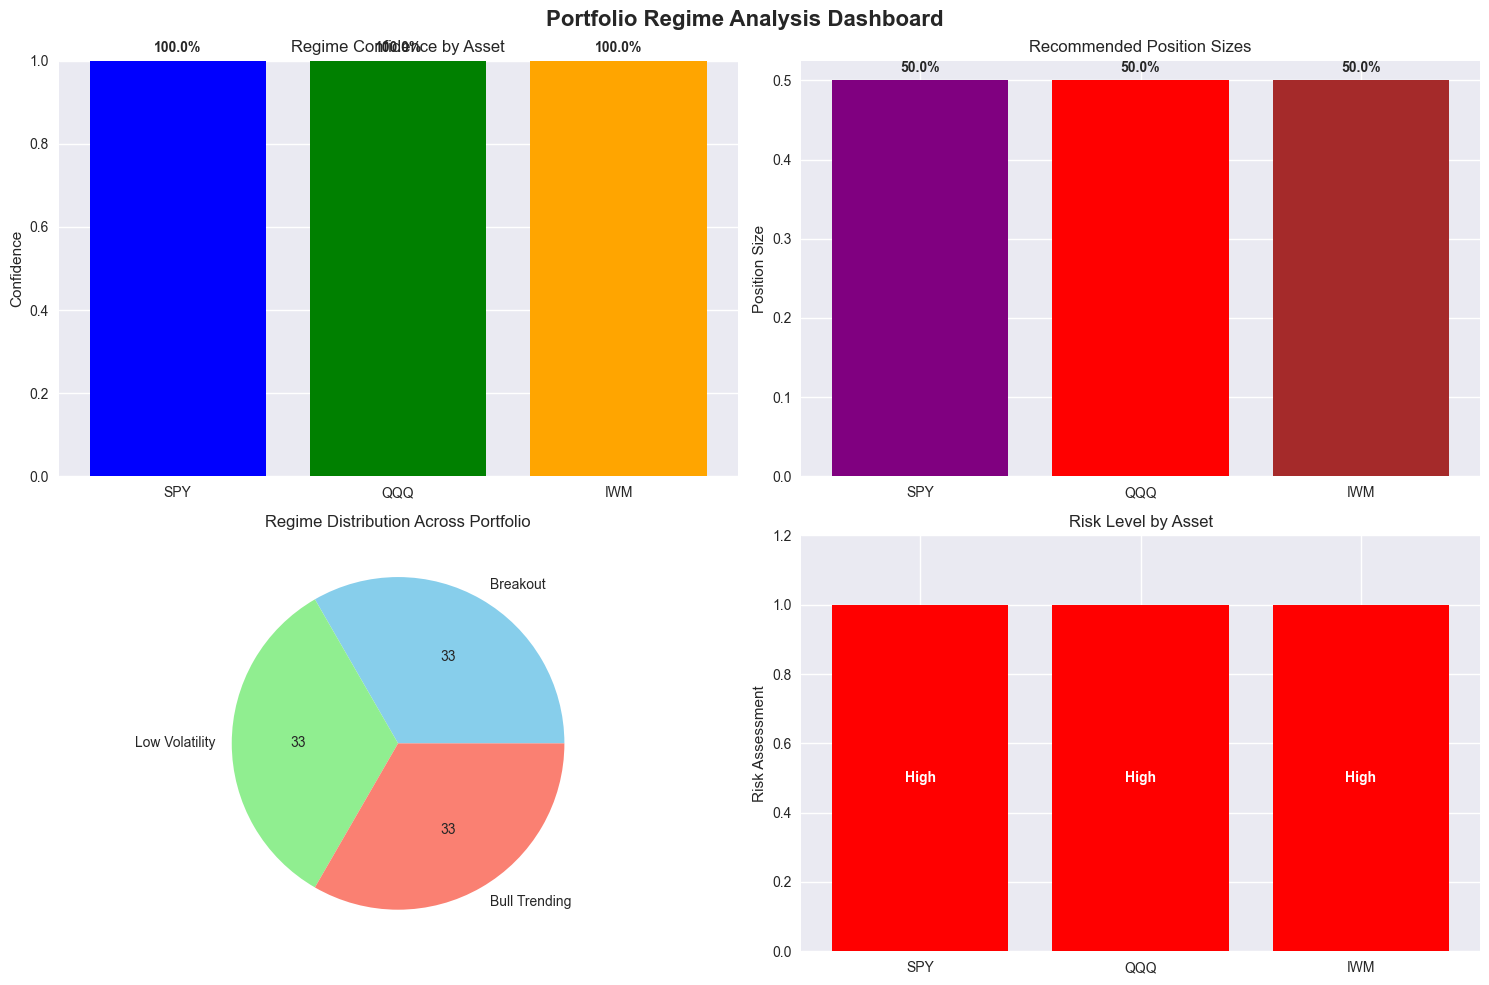

In [29]:
# Create portfolio regime visualization
if portfolio_analyses:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle("Portfolio Regime Analysis Dashboard", fontsize=16, fontweight="bold")

    # Prepare data
    symbols_list = list(portfolio_analyses.keys())
    confidences = [portfolio_analyses[s].regime_confidence for s in symbols_list]
    position_sizes = [portfolio_analyses[s].position_sizing_multiplier for s in symbols_list]
    regimes = [portfolio_analyses[s].current_regime.value for s in symbols_list]

    # Plot 1: Confidence by Asset
    bars1 = axes[0, 0].bar(symbols_list, confidences, color=["blue", "green", "orange"])
    axes[0, 0].set_title("Regime Confidence by Asset")
    axes[0, 0].set_ylabel("Confidence")
    axes[0, 0].set_ylim(0, 1)
    for i, (_symbol, conf) in enumerate(zip(symbols_list, confidences, strict=False)):
        axes[0, 0].text(i, conf + 0.02, f"{conf:.1%}", ha="center", fontweight="bold")

    # Plot 2: Position Sizes
    bars2 = axes[0, 1].bar(symbols_list, position_sizes, color=["purple", "red", "brown"])
    axes[0, 1].set_title("Recommended Position Sizes")
    axes[0, 1].set_ylabel("Position Size")
    for i, (_symbol, size) in enumerate(zip(symbols_list, position_sizes, strict=False)):
        axes[0, 1].text(
            i, size + max(position_sizes) * 0.02, f"{size:.1%}", ha="center", fontweight="bold"
        )

    # Plot 3: Regime Distribution
    regime_counts = {}
    for regime in regimes:
        regime_counts[regime] = regime_counts.get(regime, 0) + 1

    if regime_counts:
        axes[1, 0].pie(
            regime_counts.values(),
            labels=regime_counts.keys(),
            autopct="%1.0f",
            colors=["skyblue", "lightgreen", "salmon", "gold", "plum"][: len(regime_counts)],
        )
        axes[1, 0].set_title("Regime Distribution Across Portfolio")

    # Plot 4: Risk Level Comparison
    risk_levels = [portfolio_analyses[s].risk_level for s in symbols_list]
    risk_colors = {"Low": "green", "Medium": "orange", "High": "red"}
    colors = [risk_colors.get(risk, "gray") for risk in risk_levels]

    axes[1, 1].bar(symbols_list, [1] * len(symbols_list), color=colors)
    axes[1, 1].set_title("Risk Level by Asset")
    axes[1, 1].set_ylabel("Risk Assessment")
    axes[1, 1].set_ylim(0, 1.2)

    # Add risk level labels
    for i, (_symbol, risk) in enumerate(zip(symbols_list, risk_levels, strict=False)):
        axes[1, 1].text(i, 0.5, risk, ha="center", va="center", fontweight="bold", color="white")

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No portfolio data available for visualization")

## 5. Risk Management and Position Sizing

Let's explore the sophisticated risk management capabilities using Renaissance Technologies' methodologies.

In [30]:
# Risk management example with different scenarios
print("💼 RISK MANAGEMENT & POSITION SIZING")
print("=" * 50)

# Example strategy statistics
strategy_stats = {
    "win_rate": 0.65,
    "avg_win": 2.5,
    "avg_loss": 1.0,
    "current_vol": 0.20,
    "historical_vol": 0.16,
}

base_size = 0.1  # 10% base position

print("📊 Strategy Statistics:")
print(f"   Win Rate: {strategy_stats['win_rate']:.1%}")
print(f"   Average Win: {strategy_stats['avg_win']:.1f}x")
print(f"   Average Loss: {strategy_stats['avg_loss']:.1f}x")
print(f"   Risk/Reward Ratio: {strategy_stats['avg_win']:.1f}:1")
print(f"   Base Position Size: {base_size:.1%}")

# Calculate Kelly optimal size
kelly_size = SimonsRiskCalculator.calculate_kelly_optimal_size(
    win_rate=strategy_stats["win_rate"],
    avg_win=strategy_stats["avg_win"],
    avg_loss=strategy_stats["avg_loss"],
    confidence=0.8,
)

print(f"\n🎯 Kelly Optimal Size: {kelly_size:.1%}")
print("   (Using 80% confidence scaling for safety)")

💼 RISK MANAGEMENT & POSITION SIZING
📊 Strategy Statistics:
   Win Rate: 65.0%
   Average Win: 2.5x
   Average Loss: 1.0x
   Risk/Reward Ratio: 2.5:1
   Base Position Size: 10.0%

🎯 Kelly Optimal Size: 25.0%
   (Using 80% confidence scaling for safety)


### 5.1 Regime-Based Position Sizing

Now let's see how position sizes change based on different market regimes.


🎭 REGIME-BASED POSITION SIZING
🟡 Bull Trending  : 25.4% (1.02x)
🔴 Bear Trending  : 13.7% (0.55x)
🟡 Mean Reverting : 23.5% (0.94x)
🔴 High Volatility: 7.8% (0.31x)
🔴 Low Volatility : 21.5% (0.86x)
🔴 Breakout       : 17.6% (0.70x)
🔴 Unknown        : 3.9% (0.16x)


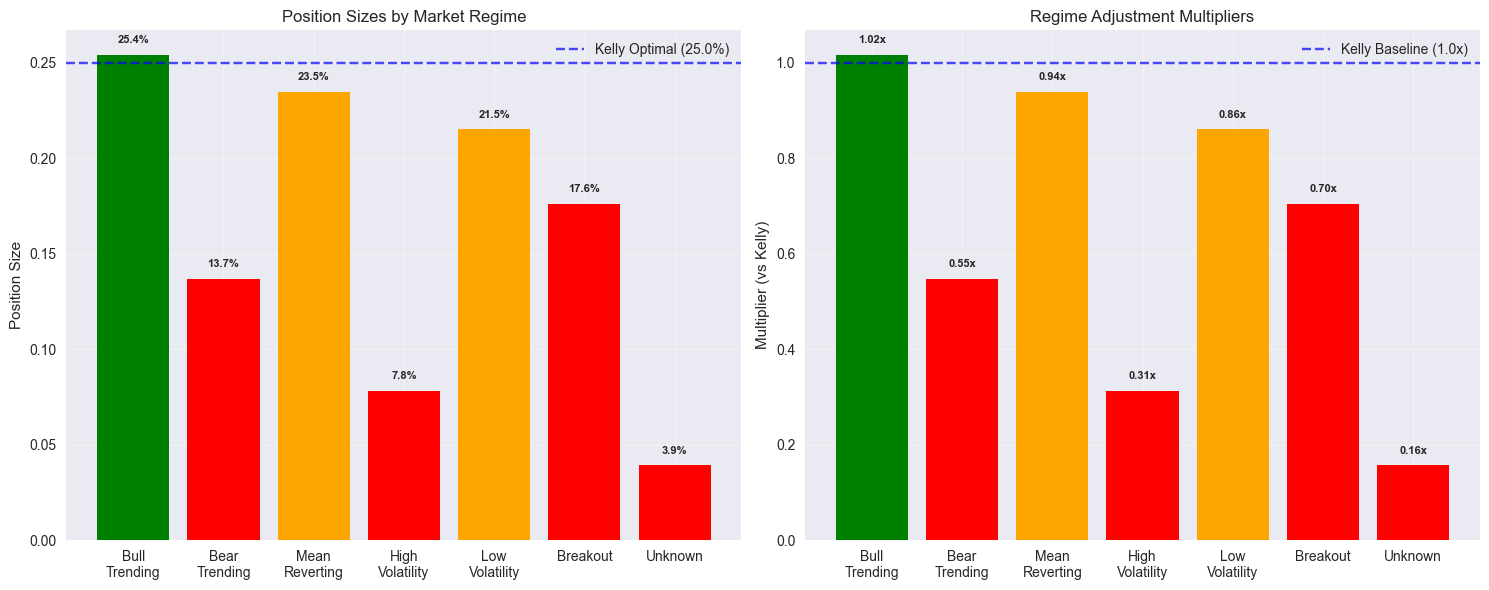

In [31]:
# Test regime-based position sizing across all regimes
regimes_to_test = list(MarketRegime)
regime_sizes = []
regime_names = []

print("\n🎭 REGIME-BASED POSITION SIZING")
print("=" * 40)

for regime in regimes_to_test:
    adjusted_size = SimonsRiskCalculator.calculate_regime_adjusted_size(
        base_size=kelly_size, regime=regime, confidence=0.8, persistence=0.7
    )

    regime_sizes.append(adjusted_size)
    regime_names.append(regime.value)

    # Color code based on size
    if adjusted_size > kelly_size * 1.1:
        emoji = "🟢"  # Increased size
    elif adjusted_size < kelly_size * 0.9:
        emoji = "🔴"  # Decreased size
    else:
        emoji = "🟡"  # Similar size

    multiplier = adjusted_size / kelly_size
    print(f"{emoji} {regime.value:<15}: {adjusted_size:.1%} ({multiplier:.2f}x)")

# Visualize regime-based position sizing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Position sizes by regime
bars = ax1.bar(
    range(len(regime_names)),
    regime_sizes,
    color=[
        "green" if s > kelly_size else "red" if s < kelly_size * 0.8 else "orange"
        for s in regime_sizes
    ],
)
ax1.axhline(
    y=kelly_size, color="blue", linestyle="--", alpha=0.7, label=f"Kelly Optimal ({kelly_size:.1%})"
)
ax1.set_title("Position Sizes by Market Regime")
ax1.set_ylabel("Position Size")
ax1.set_xticks(range(len(regime_names)))
ax1.set_xticklabels([name.replace(" ", "\n") for name in regime_names], rotation=0, ha="center")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for _i, (bar, size) in enumerate(zip(bars, regime_sizes, strict=False)):
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.005,
        f"{size:.1%}",
        ha="center",
        va="bottom",
        fontweight="bold",
        fontsize=8,
    )

# Plot 2: Multiplier effect
multipliers = [s / kelly_size for s in regime_sizes]
bars2 = ax2.bar(
    range(len(regime_names)),
    multipliers,
    color=["green" if m > 1 else "red" if m < 0.8 else "orange" for m in multipliers],
)
ax2.axhline(y=1.0, color="blue", linestyle="--", alpha=0.7, label="Kelly Baseline (1.0x)")
ax2.set_title("Regime Adjustment Multipliers")
ax2.set_ylabel("Multiplier (vs Kelly)")
ax2.set_xticks(range(len(regime_names)))
ax2.set_xticklabels([name.replace(" ", "\n") for name in regime_names], rotation=0, ha="center")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add value labels
for _i, (bar, mult) in enumerate(zip(bars2, multipliers, strict=False)):
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.02,
        f"{mult:.2f}x",
        ha="center",
        va="bottom",
        fontweight="bold",
        fontsize=8,
    )

plt.tight_layout()
plt.show()

### 5.2 Comprehensive Risk Assessment

Let's perform a comprehensive risk assessment that combines all factors.


🎯 COMPREHENSIVE POSITION SIZING BREAKDOWN
Current Market Regime: Low Volatility
Regime Confidence: 100.0%
Regime Persistence: 0.0%

Position Sizing Cascade:
   Base Size: 10.0%
   Regime Adjusted: 7.7%
   Correlation Adjusted: 7.7%
   Kelly Optimal: 25.0%
   Volatility Adjusted: 4.6%

🎯 Final Size: 4.6% ⭐

⚠️  Overall Risk Level: 🟢 LOW
💡 Recommendation: Good risk/reward setup


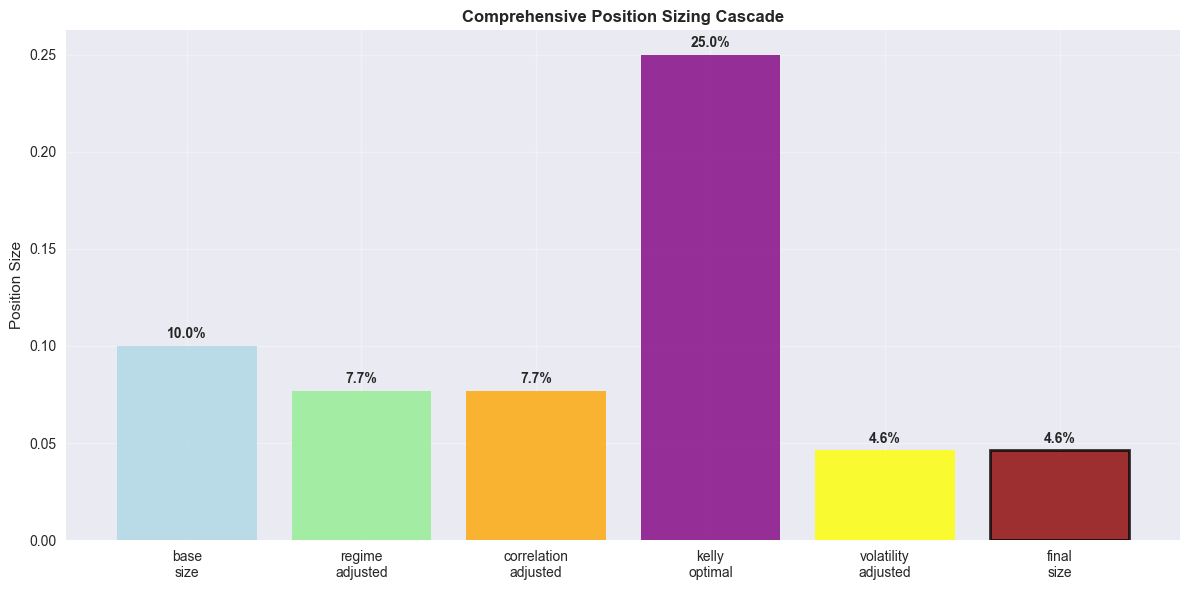

In [32]:
# Comprehensive position sizing for current market conditions
if analyses:
    current_regime_analysis = analyses["1D"]  # Use daily analysis

    comprehensive = SimonsRiskCalculator.calculate_comprehensive_position_size(
        base_size=base_size,
        regime=current_regime_analysis.current_regime,
        confidence=current_regime_analysis.regime_confidence,
        persistence=current_regime_analysis.regime_persistence,
        correlation=0.3,  # Assume 30% correlation with existing portfolio
        win_rate=strategy_stats["win_rate"],
        avg_win=strategy_stats["avg_win"],
        avg_loss=strategy_stats["avg_loss"],
        current_vol=strategy_stats["current_vol"],
        historical_vol=strategy_stats["historical_vol"],
    )

    print("\n🎯 COMPREHENSIVE POSITION SIZING BREAKDOWN")
    print("=" * 50)
    print(f"Current Market Regime: {current_regime_analysis.current_regime.value}")
    print(f"Regime Confidence: {current_regime_analysis.regime_confidence:.1%}")
    print(f"Regime Persistence: {current_regime_analysis.regime_persistence:.1%}")
    print("\nPosition Sizing Cascade:")

    for factor, size in comprehensive.items():
        if factor == "final_size":
            print(f"\n🎯 {factor.replace('_', ' ').title()}: {size:.1%} ⭐")
        else:
            print(f"   {factor.replace('_', ' ').title()}: {size:.1%}")

    # Risk assessment
    final_size = comprehensive["final_size"]
    if final_size > 0.3:
        risk_color = "🔴 HIGH"
    elif final_size > 0.15:
        risk_color = "🟡 MEDIUM"
    else:
        risk_color = "🟢 LOW"

    print(f"\n⚠️  Overall Risk Level: {risk_color}")
    print(
        f"💡 Recommendation: {'Proceed with caution' if final_size > 0.2 else 'Good risk/reward setup'}"
    )

    # Create visualization of the sizing cascade
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    factors = list(comprehensive.keys())
    sizes = list(comprehensive.values())

    # Color code the bars
    colors = ["lightblue", "lightgreen", "orange", "purple", "yellow", "red"]
    colors = colors[: len(factors)]
    colors[-1] = "darkred"  # Make final size stand out

    bars = ax.bar(factors, sizes, color=colors, alpha=0.8)

    # Highlight final size
    bars[-1].set_edgecolor("black")
    bars[-1].set_linewidth(2)

    ax.set_title("Comprehensive Position Sizing Cascade", fontweight="bold")
    ax.set_ylabel("Position Size")
    ax.set_xticklabels([f.replace("_", "\n") for f in factors], rotation=0)
    ax.grid(True, alpha=0.3)

    # Add value labels
    for bar, size in zip(bars, sizes, strict=False):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + max(sizes) * 0.01,
            f"{size:.1%}",
            ha="center",
            va="bottom",
            fontweight="bold",
        )

    plt.tight_layout()
    plt.show()

## 6. Data Export and Integration

Finally, let's demonstrate how to export data for integration with external systems.

In [33]:
# Export comprehensive analysis data
print("📤 DATA EXPORT FOR EXTERNAL SYSTEMS")
print("=" * 45)

# Export to CSV
export_filename = f"regime_analysis_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
analyzer.export_analysis_to_csv(export_filename)
print(f"✅ Analysis exported to: {export_filename}")

# Create structured data for API integration
api_data = {
    "timestamp": datetime.now().isoformat(),
    "symbol": analyzer.symbol,
    "analysis": {
        timeframe: {
            "regime": analysis.current_regime.value,
            "confidence": analysis.regime_confidence,
            "strategy": analysis.recommended_strategy.value,
            "position_size": analysis.position_sizing_multiplier,
            "risk_level": analysis.risk_level,
            "arbitrage_opportunities": len(analysis.arbitrage_opportunities),
            "statistical_signals": len(analysis.statistical_signals),
        }
        for timeframe, analysis in analyses.items()
    },
    "portfolio": {
        symbol: {
            "regime": analysis.current_regime.value,
            "confidence": analysis.regime_confidence,
            "position_size": analysis.position_sizing_multiplier,
        }
        for symbol, analysis in portfolio_analyses.items()
    }
    if portfolio_analyses
    else {},
    "risk_assessment": comprehensive if "comprehensive" in locals() else {},
}

print("\n📊 API-Ready Data Structure:")
print(f"   Timestamp: {api_data['timestamp']}")
print(f"   Symbol: {api_data['symbol']}")
print(f"   Timeframes: {list(api_data['analysis'].keys())}")
print(f"   Portfolio Assets: {list(api_data['portfolio'].keys())}")
print(
    f"   Risk Factors: {list(api_data['risk_assessment'].keys()) if api_data['risk_assessment'] else 'None'}"
)

# Example: Convert to JSON for API consumption
import json

json_filename = f"regime_analysis_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"
with open(json_filename, "w") as f:
    json.dump(api_data, f, indent=2)

print(f"✅ JSON data exported to: {json_filename}")

# Read back the CSV to show data structure
if os.path.exists(export_filename):
    df = pd.read_csv(export_filename)
    print("\n📋 CSV Export Sample (first 5 columns):")
    print(df.iloc[:, :5].to_string(index=False))

    # Clean up files
    os.remove(export_filename)
    os.remove(json_filename)
    print("\n🧹 Cleaned up temporary files")

📤 DATA EXPORT FOR EXTERNAL SYSTEMS
✓ Analysis exported to regime_analysis_20250817_173631.csv
✅ Analysis exported to: regime_analysis_20250817_173631.csv

📊 API-Ready Data Structure:
   Timestamp: 2025-08-17T17:36:31.923805
   Symbol: IWM
   Timeframes: ['1D', '1H']
   Portfolio Assets: ['SPY', 'QQQ', 'IWM']
   Risk Factors: ['base_size', 'regime_adjusted', 'correlation_adjusted', 'kelly_optimal', 'volatility_adjusted', 'final_size']
✅ JSON data exported to: regime_analysis_20250817_173631.json

📋 CSV Export Sample (first 5 columns):
                timestamp symbol timeframe  close_price        regime
2025-08-15 00:00:00-04:00    IWM        1D   227.130005 Bull Trending

🧹 Cleaned up temporary files


## 7. Summary and Next Steps

This notebook has demonstrated the comprehensive capabilities of the Market Regime Analysis System.

In [34]:
# Summary of capabilities demonstrated
print("🎉 MARKET REGIME ANALYSIS SYSTEM - SUMMARY")
print("=" * 55)

capabilities = [
    "✅ Single Asset Regime Detection using Hidden Markov Models",
    "✅ Multi-Timeframe Analysis (Daily, Hourly, 15-minute)",
    "✅ Portfolio-Level Regime Analysis across Multiple Assets",
    "✅ Renaissance Technologies Risk Management (Kelly Criterion)",
    "✅ Regime-Based Position Sizing with Confidence Scaling",
    "✅ Statistical Arbitrage Opportunity Identification",
    "✅ Pluggable Data Provider Architecture",
    "✅ Comprehensive Visualization and Reporting",
    "✅ Data Export for External System Integration",
    "✅ Production-Ready API and Programmatic Interface",
]

for capability in capabilities:
    print(f"   {capability}")

print("\n🚀 NEXT STEPS FOR IMPLEMENTATION:")
print("=" * 35)

next_steps = [
    "1. 🔑 Set up API keys for professional data providers (Alpha Vantage, Polygon.io)",
    "2. 📊 Integrate with your existing trading or analysis systems",
    "3. 🤖 Set up automated monitoring and alerting workflows",
    "4. 📈 Backtest regime-based strategies using historical data",
    "5. ⚡ Implement real-time analysis for live trading systems",
    "6. 🏦 Scale to full portfolio and multi-asset analysis",
    "7. 🔄 Set up continuous model retraining and validation",
]

for step in next_steps:
    print(f"   {step}")

print("\n💡 INTEGRATION TIPS:")
print("=" * 20)

tips = [
    "• Use MarketRegimeAnalyzer as the main entry point",
    "• All results are structured dataclasses for type safety",
    "• Provider factory pattern supports easy data source switching",
    "• Export functions enable integration with external tools",
    "• Risk calculator follows institutional-grade methodologies",
    "• System designed for both research and production use",
]

for tip in tips:
    print(f"   {tip}")

print("\n🎯 Ready to revolutionize your quantitative trading analysis!")

🎉 MARKET REGIME ANALYSIS SYSTEM - SUMMARY
   ✅ Single Asset Regime Detection using Hidden Markov Models
   ✅ Multi-Timeframe Analysis (Daily, Hourly, 15-minute)
   ✅ Portfolio-Level Regime Analysis across Multiple Assets
   ✅ Renaissance Technologies Risk Management (Kelly Criterion)
   ✅ Regime-Based Position Sizing with Confidence Scaling
   ✅ Statistical Arbitrage Opportunity Identification
   ✅ Pluggable Data Provider Architecture
   ✅ Comprehensive Visualization and Reporting
   ✅ Data Export for External System Integration
   ✅ Production-Ready API and Programmatic Interface

🚀 NEXT STEPS FOR IMPLEMENTATION:
   1. 🔑 Set up API keys for professional data providers (Alpha Vantage, Polygon.io)
   2. 📊 Integrate with your existing trading or analysis systems
   3. 🤖 Set up automated monitoring and alerting workflows
   4. 📈 Backtest regime-based strategies using historical data
   5. ⚡ Implement real-time analysis for live trading systems
   6. 🏦 Scale to full portfolio and multi-ass